#### Кафедра дискретной математики МФТИ

#### Курс математической статистики

Игашов Илья, 593 групппа

#  Задание №4

## №3

Рассмотрим $X_1,\dots, X_n$ ~ $Bern(\theta)$. По сетке значений $\theta\in [0, 1]$ с шагом $0,01$ постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой можно сделать вывод (напишите в комментариях)? Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n = 1000$ для параметра $\theta$, посчитайте эффективную оценку θ и бутстрепную оценку дисперсии (параметрический бутстреп, количество бутстрепных выборок равно 500) этой эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

%matplotlib inline

In [2]:
# Считаем информацию Фишера для разных значений параметра theta:
Fisher = np.array([1 / (theta * (1 - theta)) for theta in np.arange(0.01, 1, 0.01)])    

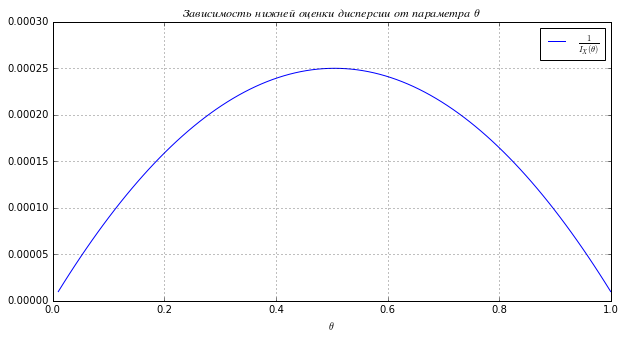

In [3]:
# Строим график:

N = 1000
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0.01, 1, 99), 1 /(N * Fisher), label=r'$\frac{1}{I_X(\theta)}$')
plt.ylim(0, 0.0003)

plt.legend()
plt.title(r'$Зависимость \ нижней \ оценки \ дисперсии \ от \ параметра \ \theta$')
plt.xlabel(r'$\theta$', fontsize='10')
plt.grid()
plt.show()

Можно сделать вывод, что при $\theta = 0,5$ функция нижней оценки дисперсии $\frac{1}{I_X(\theta)} = \frac{1}{n*i(\theta)}$ достигает максимума, что означает, что при  данном значении параметра в одном наблюдении содержится минимальное количество информации Фишера.

In [4]:
# Для каждого theta из сетки генерим выборку размера N, для нее считаем оценку, 
# По этой оценке генерим K бутстрепных выборок размера N,
# Для кажой бутстрепной выборки считаем оценку по ней и считаем дисперсию полученных K оценок.

K = 500
variance = []
for theta in np.arange(0.01, 1, 0.01):
    sample = binom.rvs(1, theta, size=N)
    eff_estimate = np.cumsum(sample) / [1 + n for n in range(N)]
    b_samples = np.array([binom.rvs(1, eff_estimate[N - 1], size=N) for k in range(K)])
    b_effs = np.array([np.cumsum(b_samples[k]) / [1 + n for n in range(N)] for k in range(K)])
    b_var = np.sum(np.array([b_effs[k][N - 1] 
                             for k in range(K)]) ** 2) / K - (np.sum([b_effs[k][N - 1] 
                                                                      for k in range(K)]) / K) ** 2
    variance.append(b_var)

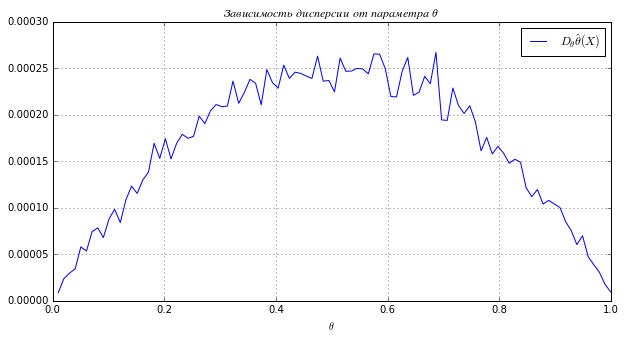

In [5]:
# Строим график зависимости дисперсии от theta.

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0.01, 1, 99), variance, label=r'$D_{\theta}\hat\theta(X)$')

plt.legend()
plt.title(r'$Зависимость \ дисперсии \ от \ параметра \ \theta$')
plt.xlabel(r'$\theta$', fontsize='10')
plt.grid()
plt.show()

# Вывод

$$D_{\theta}\hat\theta(X) = D_{\theta}(\bar{X}) = \dots = \frac{\theta(1 - \theta)}{n}$$

$$I_{X}(\theta) = n* i(\theta) = \frac{n}{\theta(1-\theta)}$$

По определению эффективной оценки неравенство Крамера-Рао должно превращаться в равенство:
$$ D_{\theta}\hat\theta(X) = \frac{1}{I_{X}(\theta)} = \frac{1}{n*i(\theta)} $$

Из графиков видно, что равенство в неравенстве Крамера-Рао выполняется, и оценка $\bar{X}$ действительно является эффективной для распределения Бернулли. 
